<a href="https://colab.research.google.com/github/msdokania/CamCapture_Offloading3/blob/main/MobileComputing_Assignment2_Single_Flask_server_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [28]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


## Loading The Dataset

In [29]:
#loading the dataset.......(Train)
'''train = pd.read_csv("input/train.csv")
print(train.shape)
train.head()'''

'train = pd.read_csv("input/train.csv")\nprint(train.shape)\ntrain.head()'

In [30]:
#loading the dataset.......(Test)
'''test= pd.read_csv("input/test.csv")
print(test.shape)
test.head()'''

'test= pd.read_csv("input/test.csv")\nprint(test.shape)\ntest.head()'

In [ ]:
'''x_train = (train.iloc[:,1:].values).astype('float32') 
y_train = train.iloc[:,0].values.astype('int32') 
x_test = test.values.astype('float32')'''

## Normalising The Input Data 

In [31]:
x_train = x_train/255.0
x_test = x_test/255.0

>  ## Normalizing input shape to one that will be accepted by Keras

In [8]:
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
batch_size = 64
num_classes = 10
epochs = 20
input_shape = (28, 28, 1)

In [10]:
y_train = keras.utils.to_categorical(y_train, num_classes)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

**Creating layer in CNN**

In [11]:
model = Sequential()
##Hidden Layer 1
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))

##Hidden Layer 2
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

##Hidden Layer 3
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

## Batch Normalization layer
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [32]:
# from tensorflow import keras
# keras.utils.plot_model(model,show_shapes = True, rankdir = "LR")

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                        

In [13]:
data_generator.fit(X_train)
h = model.fit_generator(data_generator.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[lr_reduction],)

Epoch 1/20


<ipython-input-13-f325cffefe2d>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(data_generator.flow(X_train,Y_train, batch_size=batch_size),


843/843 [==============================] - ETA: 0s - loss: 0.2769 - accuracy: 0.9133

843/843 [==============================] - 143s 168ms/step - loss: 0.2769 - accuracy: 0.9133 - val_loss: 0.0644 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 2/20
843/843 [==============================] - ETA: 0s - loss: 0.0924 - accuracy: 0.9712

843/843 [==============================] - 133s 158ms/step - loss: 0.0924 - accuracy: 0.9712 - val_loss: 0.0311 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 3/20
843/843 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.9778

843/843 [==============================] - 134s 159ms/step - loss: 0.0717 - accuracy: 0.9778 - val_loss: 0.0272 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 4/20
843/843 [==============================] - ETA: 0s - loss: 0.0642 - accuracy: 0.9808

843/843 [==============================] - 132s 157ms/step - loss: 0.0642 - accuracy: 0.9808 - val_loss: 0.0352 - val_accuracy: 0.9888 - lr: 0.0010
Epoch 5/20
843/843 [==============================] - ETA: 0s - loss: 0.0564 - accuracy: 0.9825

843/843 [==============================] - 132s 157ms/step - loss: 0.0564 - accuracy: 0.9825 - val_loss: 0.0336 - val_accuracy: 0.9903 - lr: 0.0010
Epoch 6/20
843/843 [==============================] - ETA: 0s - loss: 0.0489 - accuracy: 0.9850

843/843 [==============================] - 132s 157ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0314 - val_accuracy: 0.9923 - lr: 0.0010
Epoch 7/20
843/843 [==============================] - ETA: 0s - loss: 0.0464 - accuracy: 0.9858

843/843 [==============================] - 131s 156ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0204 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 8/20
843/843 [==============================] - ETA: 0s - loss: 0.0459 - accuracy: 0.9860

843/843 [==============================] - 132s 157ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0221 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 9/20
843/843 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9869

843/843 [==============================] - 131s 155ms/step - loss: 0.0436 - accuracy: 0.9869 - val_loss: 0.0325 - val_accuracy: 0.9915 - lr: 0.0010
Epoch 10/20
843/843 [==============================] - ETA: 0s - loss: 0.0403 - accuracy: 0.9880

843/843 [==============================] - 145s 172ms/step - loss: 0.0403 - accuracy: 0.9880 - val_loss: 0.0239 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 11/20
843/843 [==============================] - ETA: 0s - loss: 0.0384 - accuracy: 0.9882

843/843 [==============================] - 132s 157ms/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.0207 - val_accuracy: 0.9935 - lr: 0.0010
Epoch 12/20
843/843 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9886

843/843 [==============================] - 137s 162ms/step - loss: 0.0373 - accuracy: 0.9886 - val_loss: 0.0222 - val_accuracy: 0.9932 - lr: 0.0010
Epoch 13/20
843/843 [==============================] - ETA: 0s - loss: 0.0365 - accuracy: 0.9887

843/843 [==============================] - 132s 156ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0243 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 14/20
843/843 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 0.9895

843/843 [==============================] - 131s 155ms/step - loss: 0.0343 - accuracy: 0.9895 - val_loss: 0.0257 - val_accuracy: 0.9932 - lr: 0.0010
Epoch 15/20
843/843 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9901

843/843 [==============================] - 131s 155ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0240 - val_accuracy: 0.9932 - lr: 0.0010
Epoch 16/20
843/843 [==============================] - ETA: 0s - loss: 0.0335 - accuracy: 0.9903

843/843 [==============================] - 131s 155ms/step - loss: 0.0335 - accuracy: 0.9903 - val_loss: 0.0215 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 17/20
843/843 [==============================] - ETA: 0s - loss: 0.0318 - accuracy: 0.9905

843/843 [==============================] - 132s 156ms/step - loss: 0.0318 - accuracy: 0.9905 - val_loss: 0.0248 - val_accuracy: 0.9938 - lr: 0.0010
Epoch 18/20
843/843 [==============================] - ETA: 0s - loss: 0.0335 - accuracy: 0.9902

843/843 [==============================] - 130s 154ms/step - loss: 0.0335 - accuracy: 0.9902 - val_loss: 0.0214 - val_accuracy: 0.9940 - lr: 0.0010
Epoch 19/20
843/843 [==============================] - ETA: 0s - loss: 0.0325 - accuracy: 0.9900

843/843 [==============================] - 131s 155ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0237 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 20/20
843/843 [==============================] - ETA: 0s - loss: 0.0324 - accuracy: 0.9906

843/843 [==============================] - 132s 157ms/step - loss: 0.0324 - accuracy: 0.9906 - val_loss: 0.0305 - val_accuracy: 0.9917 - lr: 0.0010


## Basic Simple Plot And Evaluation

In [15]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.030460, final accuracy: 0.991667


188/188 [==============================] - 4s 20ms/step


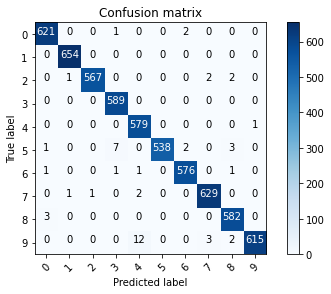

In [16]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
Y_true = np.argmax(Y_val, axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


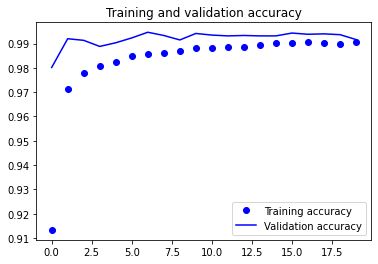

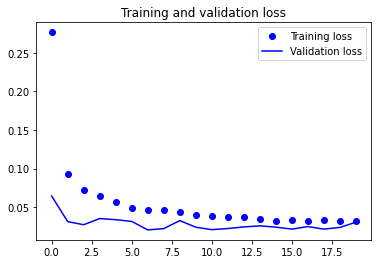

In [17]:
print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Activation of the 2nd channel of the first layer:**

1/1 [==============================] - 0s 72ms/step


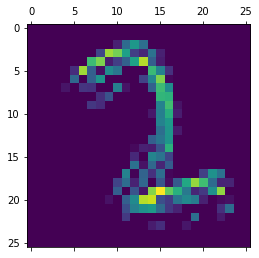

In [18]:
from keras import models
test_im = X_train[154]
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(model.input, layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

**Let's plot the activations of the other conv layers as well.**

In [19]:
model.layers[:-1]# Droping The Last Dense Layer

## Classifcation Report

In [20]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true_classes = np.argmax(Y_val, axis = 1)

188/188 [==============================] - 4s 21ms/step


In [21]:
Y_pred_classes[:5], Y_true_classes[:5]

(array([7, 3, 8, 9, 3]), array([7, 3, 8, 9, 3]))

In [22]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(Y_true_classes, Y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99       624
     Class 1       1.00      1.00      1.00       654
     Class 2       1.00      0.99      0.99       572
     Class 3       0.98      1.00      0.99       589
     Class 4       0.97      1.00      0.99       580
     Class 5       1.00      0.98      0.99       551
     Class 6       0.99      0.99      0.99       580
     Class 7       0.99      0.99      0.99       633
     Class 8       0.99      0.99      0.99       585
     Class 9       1.00      0.97      0.99       632

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



In [23]:
model.save('Final_model.h5')

# **Prediction of the Data**

In [24]:
!pip install pytesseract
import cv2
import pytesseract
import cv2
import numpy as np
from matplotlib import pyplot as plt, cm


def areaFilter(minArea, inputImage):
    componentsNumber, labeledImage, componentStats, componentCentroids = \
        cv2.connectedComponentsWithStats(inputImage, connectivity=4)
    remainingComponentLabels = [i for i in range(1, componentsNumber) if componentStats[i][4] >= minArea]
    filteredImage = np.where(np.isin(labeledImage, remainingComponentLabels) == True, 255, 0).astype('uint8')
    return filteredImage

def preprocess(path):
    inputImage = cv2.imread(path)
    imgFloat = inputImage.astype(np.float) / 255.
    kChannel = 1 - np.max(imgFloat, axis=2)
    kChannel = (255 * kChannel).astype(np.uint8)
    binaryThresh = 190
    _, binaryImage = cv2.threshold(kChannel, binaryThresh, 255, cv2.THRESH_BINARY)
    minArea = 100
    binaryImage = areaFilter(minArea, binaryImage)
    kernelSize = 3
    opIterations = 2
    morphKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
    binaryImage = cv2.morphologyEx(binaryImage, cv2.MORPH_CLOSE, morphKernel, None, None, opIterations, cv2.BORDER_REFLECT101)
    plt.imsave('filename.png', np.array(cv2.resize(binaryImage, (400, 300))), cmap=cm.gray)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 69.0 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [25]:
import matplotlib
from numpy import argmax
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy
import cv2
from google.colab.patches import cv2_imshow
## Loading the image
def load_image(filename):
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	img = img / 255.0
	return img
	
## predicting the image
def prediction(path):
	preprocess(path)
	img = load_image('filename.png')
	model = load_model('Final_model.h5')
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	print(digit)
	return digit


In [26]:
!pip install pyngrok==4.1.1
!pip install flask_ngrok

from google.colab import drive

!ngrok authtoken 27N5X6KO266ymlvn9Sx5irrBcrj_5ZzJveSFoaBcRNPja6Wmg #Without "" marks 

import flask
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template, jsonify, make_response
import base64
import os, os.path
app = Flask(__name__)
run_with_ngrok(app)


counter = 1
@app.route('/upload', methods=['POST'])
def upload_picture():
    global counter
    b64_encodedImg = flask.request.form['image_string']
    # image_category = flask.request.form['image_category']
    img_data = base64.b64decode(b64_encodedImg)
    
    image_filename = 'image.jpg'
    
    with open_safe_path("temp" + "/" + image_filename) as f:
        f.write(img_data)
    f.close()
    prediction("temp" + "/" + image_filename)
    directory = str(prediction("temp" + "/" + image_filename))
    with open_safe_path(directory + "/" + directory+"_"+str(counter)+".jpg") as f:
        f.write(img_data)
        counter+=1
    f.close()
    data = {'message': 'Done', 'code': 'SUCCESS', 'number':directory}
    return make_response(jsonify(data), 201)


def open_safe_path(path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    return open(path, 'wb')
@app.route('/')
def text():
  return f"Running Flask on Google Colab"

app.run()





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15982 sha256=c74565cd0a3ed867c819d33146662bd47a0a03d0d699a792c99235669018f810
  Stored in directory: /root/.cache/pip/wheels/5e/0a/51/8cb053ccd84481dd3233eba4cdb608bc7a885fd8ca418c0806
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://4266-34-145-239-50.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
